In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats
import scipy.io as io
import time

from scipy.interpolate import CubicSpline

plt.rc("font", family=["Times New Roman"]) #skifter skrifttype
plt.rc("axes", labelsize=18)   #skriftstørrelse af `xlabel` og `ylabel`
plt.rc("xtick", labelsize=16, direction="out")  #skriftstørrelse af ticks og viser ticks øverst
plt.rc("ytick", labelsize=16, direction="out")
plt.rc("axes", titlesize=22)
plt.rc("legend", fontsize=16)

In [2]:
path_array = [r"C:/Users/nicol/Experimentel Physics/Experimentel-Physics-2/Mach-Zender/Refractive index", 
              r"/Users/karsten/eksperimental/Experimentel-Physics-2/Mach-Zender/Refractive index"]

def get_data(entries):
    data = io.loadmat(path_array[0] + entries)
        
    length = data.get("Length")[0][0]
    Tinterval = data.get("Tinterval")[0][0]
    Tstart = data.get("Tstart")[0][0]
    
    t = np.arange(Tstart, Tinterval*length, Tinterval)
    V = np.transpose(data.get("A"))[0]
    
    return t, V
                    

##### Making figure of raw data

Text(0.5, 1.01, 'Measured intensity during pressure drop')

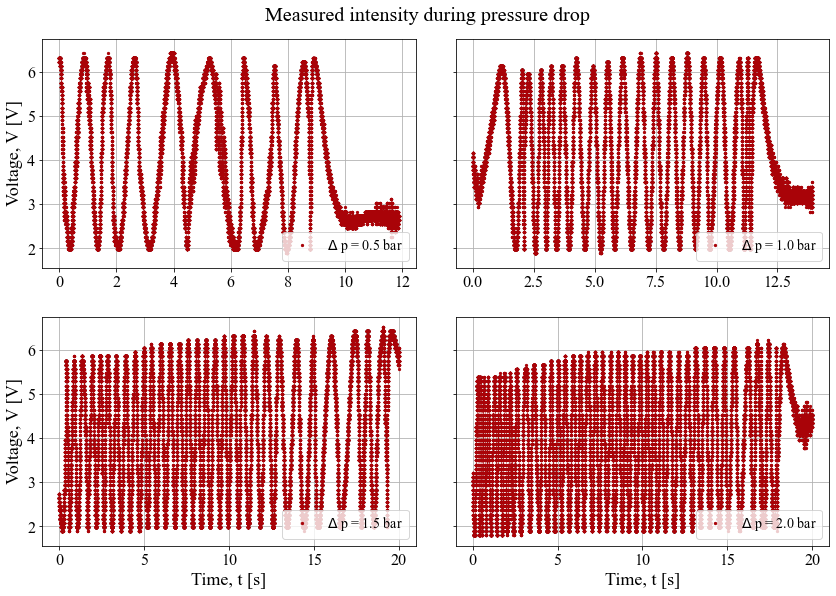

In [28]:
t05, V05 = get_data(r"/0.5 bar.mat")
t1, V1 = get_data(r"/1 bar.mat")
t15, V15 = get_data(r"/1.5 bar.mat")
t2, V2 = get_data(r"/2 bar.mat")

fig, ax = plt.subplots(2, 2, sharey = True, figsize=(12,8))
fig.tight_layout(pad=2.0)

tsize = 14

tVdp = [[t05, V05, 0.5], [t1, V1, 1.0], [t15, V15, 1.5], [t2, V2, 2.0]]

track = 1

for axs_ar in ax : 
    for axs in axs_ar : 
        axs.plot(tVdp[track-1][0], tVdp[track-1][1], '.', label="$\Delta$ p = {} bar".format(tVdp[track-1][2]), color='#a90308', markersize=4.5)
        axs.legend(loc = 'lower right', prop={'size':14})
        axs.grid()
        if track == 3 or track == 4 :
            axs.set_xlabel("Time, t [s]")
        if track == 1 or track == 3 : 
            axs.set_ylabel("Voltage, V [V]")
        track += 1
    
fig.suptitle("Measured intensity during pressure drop", size = 20, y = 1.01)


##### Analyzing the data read by eye

In [97]:
m05 = [18, 10, 12]
m10 = [36, 38, 39]
m15 = [62, 58, 61]
m20 = [84, 80, 97]

m0 = [18, 36, 62, 84]
m1 = [10, 38, 58, 80]
m2 = [12, 39, 61, 97]

m_array = [m05, m10, m15, m20]
m_sig = 1

dp_list = [0.5, 1.0, 1.5, 2.0]
dp_sig = 0.05


In [124]:
def linear(t, *p) : 
    a = p[0]
    b = p[1]
    return a*t+b

[44.800000000095544, 46.0, 55.39999998244137]
[0.001999999991502307, 0.002000000000017259, 0.0019999999896886866]


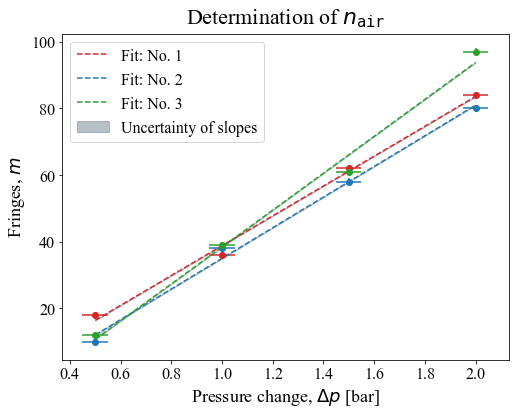

In [127]:
fig, ax = plt.subplots(figsize=(8,6))

ax.set_xlabel("Pressure change, $\Delta p$ [bar]")
ax.set_ylabel("Fringes, $m$")
ax.set_title("Determination of $n_{\mathtt{air}}$", pad = 10)

cols = ['tab:red', 'tab:blue', 'tab:green']

for i, dp in enumerate(dp_list) : 
    for m, col in zip(m_array[i], cols) : 
        placeholder1 = ax.errorbar(dp, m, xerr= dp_sig, yerr=m_sig, fmt='o', color=col)

a_sig = []
a = []
placeholder2 = 0

for n, col, m in zip(range(len(m0)),cols, [m0, m1, m2]) : 
    popt, pcov = curve_fit(linear, dp_list, m, sigma=[0.05] * len(dp_list), p0=[1, 1], absolute_sigma=True)
    
    dp_fit = np.linspace(min(dp_list), max(dp_list), 1000)
    m_fit = linear(dp_fit, *popt)
    
    a.append(popt[0])
    a_sig.append(pcov[0][0])
    
    ax.plot(dp_fit, m_fit, linestyle='--', color=col, label='Fit: No. {}'.format(n+1))
    upper = linear(dp_fit, *[popt[0]+pcov[0][0], popt[1]])
    lower = linear(dp_fit, *[popt[0]-pcov[0][0], popt[1]])
    placeholder2 = ax.fill_between(dp_fit, lower, upper, color='slategrey', alpha=0.5)

placeholder2.set_label('Uncertainty of slopes')
ax.legend(loc='upper left')
print(a)
print(a_sig)

In [126]:
def slope_to_n(slope) : 
    

SyntaxError: unexpected EOF while parsing (<ipython-input-126-02e07fd29496>, line 2)